In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
from pathlib import Path

In [4]:
PATH = Path('/local/S.Rasp/ML-Workshop-Data')

## Check out the data

In [17]:
%time df_train = pd.read_csv(PATH / 'pp_train.csv', index_col=0)

CPU times: user 5.07 s, sys: 524 ms, total: 5.6 s
Wall time: 4.88 s


In [18]:
df_test = pd.read_csv(PATH / 'pp_test.csv', index_col=0)

In [19]:
df_train.head()

,t2m_obs,time,station,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,v_pl500_fc_mean,...,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
783483,1.2,2011-01-01,3,-0.022290,107.439460,202.0,50.7827,6.0941,4.760467,-4.907918,...,101379.51,98.056010,634981.400,39645.008,2.208909,0.755302,2433034.8,-3513225.0,273.57892,374.63348
783484,1.6,2011-01-01,44,2.086415,19.397774,44.0,52.9335,8.2370,14.442179,-10.303844,...,101709.04,98.741800,1592483.900,370638.600,6.223993,0.800821,2427059.2,-1702554.9,275.06873,388.60350
783485,-6.3,2011-01-01,71,-6.609096,604.885000,759.0,48.2156,8.9784,0.254339,-6.281372,...,94432.85,91.602340,-1416809.800,-239365.980,-0.394419,-0.950840,4320586.0,-4435227.5,265.47473,437.02300
783486,-3.0,2011-01-01,73,-5.071753,461.441800,340.0,48.6159,13.0506,2.489346,-10.044441,...,97368.55,91.139370,48696.496,-570603.400,1.923471,0.336067,5658946.5,-6691302.0,267.49640,366.52255
783487,0.5,2011-01-01,78,1.743580,47.632523,65.0,52.4853,7.9126,11.600490,-9.078665,...,101419.82,99.178986,1435826.900,616228.750,4.472726,0.673820,2416039.5,-1872194.9,274.56433,263.73572


In [22]:
df_test.head()

,time,station,t2m_fc_mean,orog,station_alt,station_lat,station_lon,u_pl500_fc_mean,v_pl500_fc_mean,gh_pl500_fc_mean,...,sp_fc_mean,tcc_fc_mean,sshf_fc_mean,slhf_fc_mean,u10_fc_mean,v10_fc_mean,ssr_fc_mean,str_fc_mean,d2m_fc_mean,sm_fc_mean
0,2016-01-01,44,4.001778,19.397774,44.0,52.9335,8.2370,10.133337,10.131109,5481.7905,...,101887.90,24.705662,5775243.0,-1288526.40,1.341565,3.249270,3298437.0,-10775857.0,275.95218,375.07983
1,2016-01-01,71,0.933522,604.885000,759.0,48.2156,8.9784,19.385162,2.524293,5588.5977,...,94560.06,78.469610,1349700.0,-227886.42,1.287638,0.519051,5560022.0,-6258117.0,273.41055,431.60340
2,2016-01-01,73,-0.188741,461.441800,340.0,48.6159,13.0506,9.542810,1.230813,5593.8506,...,97636.46,98.030160,2487178.5,-1343765.20,0.499829,0.657743,6949536.0,-9512730.0,271.99976,361.13397
3,2016-01-01,78,3.953006,47.632523,65.0,52.4853,7.9126,10.977405,9.408463,5488.8840,...,101561.08,20.500540,5856912.0,-1207934.40,1.439010,3.148981,3502853.8,-10732310.0,275.77515,245.30484
4,2016-01-01,91,1.293405,348.869900,300.0,50.7446,9.3450,14.657755,8.755051,5538.4110,...,97486.05,83.718890,1802866.2,-874888.00,0.996717,1.799243,2939294.0,-6318281.0,274.60370,378.45820


In [20]:
df_train.apply(pd.Series.isna).mean()

t2m_obs             0.073126
time                0.000000
station             0.000000
t2m_fc_mean         0.000000
orog                0.000000
station_alt         0.000000
station_lat         0.000000
station_lon         0.000000
u_pl500_fc_mean     0.000000
v_pl500_fc_mean     0.000000
gh_pl500_fc_mean    0.000000
u_pl850_fc_mean     0.000000
v_pl850_fc_mean     0.000000
q_pl850_fc_mean     0.000000
cape_fc_mean        0.000000
sp_fc_mean          0.000000
tcc_fc_mean         0.000000
sshf_fc_mean        0.000000
slhf_fc_mean        0.000000
u10_fc_mean         0.000000
v10_fc_mean         0.000000
ssr_fc_mean         0.000000
str_fc_mean         0.000000
d2m_fc_mean         0.000000
sm_fc_mean          0.095825
dtype: float64

In [24]:
df_train.dropna(subset=['t2m_obs'], inplace=True)

In [27]:
df_train['sm_fc_mean'].replace(np.nan, df_train.sm_fc_mean.mean(), inplace=True)

In [29]:
df_test['sm_fc_mean'].replace(np.nan, df_train.sm_fc_mean.mean(), inplace=True)

/home/s/S.Rasp/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


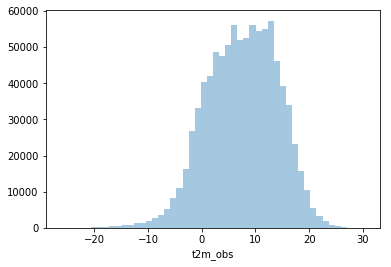

In [32]:
sns.distplot(df_train['t2m_obs'], kde=False)

## Split and Normalize the data

In [52]:
X_train_all = df_train.drop(['t2m_obs', 'time', 'station'], 1)
y_train_all = df_train['t2m_obs']
X_test = df_test.drop(['time', 'station'], 1)

In [53]:
X_train_all.shape, y_train_all.shape, X_test.shape

((908857, 22), (908857,), (182218, 22))

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
X_train_all = scaler.transform(X_train_all)
X_test = scaler.transform(X_test)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [57]:
X_train = X_train_all[df_train.time < '2015-01-01']
X_valid = X_train_all[df_train.time >= '2015-01-01']
y_train = y_train_all[df_train.time < '2015-01-01']
y_valid = y_train_all[df_train.time >= '2015-01-01']

In [58]:
X_train.shape, X_valid.shape

((728008, 22), (180849, 22))

## Linear regression

In [66]:
def mse(y_true, y_pred): return ((y_true - y_pred)**2).mean()

In [68]:
mse(y_valid, df_train.t2m_fc_mean[df_train.time >= '2015-01-01'])

4.135858792431942

In [64]:
lin_reg = LinearRegression()

In [65]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
# R2
#lin_reg.score(X_valid, y_valid)

0.9187372901848856

In [71]:
y_pred = lin_reg.predict(X_valid)

In [72]:
mse(y_valid, y_pred)

3.2422963614329743

## Decision tree